In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import ast
import numpy as np
from statistics import mean 

In [2]:
movies_2015_2024 = pd.read_csv('../data/movies_2015_2024.csv')
movies_2015_2024.head(2)

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,365000000,1405403694,99861
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,150000000,378858340,76341


#### Exploratory Question: How do movie ratings (vote average) relate to box-office performance? #4

In [4]:
movies_2015_2024['Genre'] = movies_2015_2024['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
movies_exploded = movies_2015_2024.explode('Genre', ignore_index = False)
movies_exploded.head(2)

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID
0,Avengers: Age of Ultron,2015,Action,7.271,23855,365000000,1405403694,99861
0,Avengers: Age of Ultron,2015,Adventure,7.271,23855,365000000,1405403694,99861


In [39]:
movies_exploded['log_rev'] = np.log(movies_exploded['Revenue']+1)
movies_exploded.head(2)

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,log_rev
0,Avengers: Age of Ultron,2015,Action,7.271,23855,365000000,1405403694,99861,21.06359
0,Avengers: Age of Ultron,2015,Adventure,7.271,23855,365000000,1405403694,99861,21.06359


In [47]:
movies_exploded['rev_minus_budget'] = movies_exploded['Revenue'].sub(movies_exploded['Budget'], axis=0)
movies_exploded.head(2)

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,log_rev,rev_minus_budget
0,Avengers: Age of Ultron,2015,Action,7.271,23855,365000000,1405403694,99861,21.06359,1040403694
0,Avengers: Age of Ultron,2015,Adventure,7.271,23855,365000000,1405403694,99861,21.06359,1040403694


#### The R-squared is in line with what is seen in these plots in that there is still a significant amount of variability that hasn't been explained with just Vote Average and Revenue. We have a low r-squared value as it is looking at how much variability in Vote Average vs Revenue is explained by the model. 

In [50]:
lm_vtavg_rev_exploded = smf.ols('Vote_Average ~ Revenue', data = movies_exploded).fit()
lm_vtavg_rev_exploded.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Vote_Average   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     78.60
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           1.31e-18
Time:                        00:42:44   Log-Likelihood:                -2774.7
No. Observations:                2833   AIC:                             5553.
Df Residuals:                    2831   BIC:                             5565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8381      0.014    473.291      0.000       6.810       6.866
Revenue     3.229e-10   3.64e-11      8.866      0.000    2.51e-10    3.94e-10
==============================================================================
Omnibus:                        8.565   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.518
Skew:                          -0.128   Prob(JB):                       0.0141
Kurtosis:                       3.080   Cond. No.                     4.73e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
lm_vtavg_rev_exploded = smf.ols('Vote_Average ~ rev_minus_budget', data = movies_exploded).fit()
lm_vtavg_rev_exploded.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Vote_Average   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     113.0
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           6.45e-26
Time:                        00:43:25   Log-Likelihood:                -2758.0
No. Observations:                2833   AIC:                             5520.
Df Residuals:                    2831   BIC:                             5532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.8419      0.014    505.037      0.000       6.815       6.868
rev_minus_budget  4.437e-10   4.17e-11     10.632      0.000    3.62e-10    5.26e-10
==============================================================================
Omnibus:                        7.481   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.422
Skew:                          -0.121   Prob(JB):                       0.0245
Kurtosis:                       3.068   Cond. No.                     3.65e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
lm_log_vtavg_rev_exploded = smf.ols('Vote_Average ~ I(np.log(Revenue+1))', data=movies_exploded).fit()
lm_log_vtavg_rev_exploded.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Vote_Average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1701
Date:                Sat, 22 Nov 2025   Prob (F-statistic):              0.680
Time:                        00:24:23   Log-Likelihood:                -2813.4
No. Observations:                2833   AIC:                             5631.
Df Residuals:                    2831   BIC:                             5643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.8967      0.030    230.360      0.000       6.838       6.955
I(np.log(Revenue + 1))     0.0007      0.002      0.412      0.680      -0.003       0.004
==============================================================================
Omnibus:                       11.937   Durbin-Watson:                   0.645
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.939
Skew:                          -0.155   Prob(JB):                      0.00255
Kurtosis:                       3.069   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

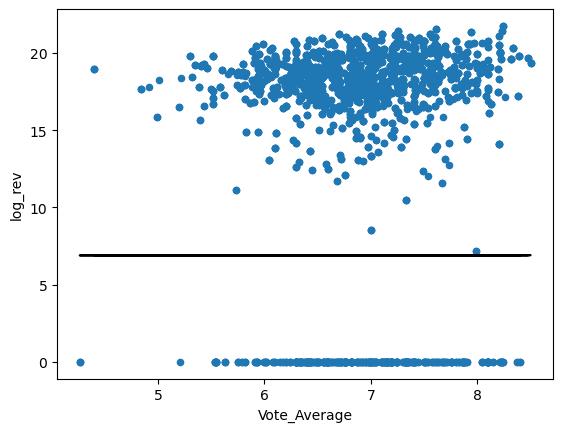

In [8]:
movies_exploded.plot(x = 'Vote_Average', y = 'log_rev', kind = 'scatter')
plt.plot(movies_exploded['Vote_Average'], lm_log_vtavg_rev_exploded.fittedvalues, color = 'black');

In [9]:
movies_exploded['Budget'].nsmallest(400)

78          0
78          0
85          0
85          0
85          0
        ...  
873    100000
99     250000
99     250000
99     250000
99     250000
Name: Budget, Length: 400, dtype: int64

In [33]:
#movies_exploded_nolow = movies_exploded[movies_exploded.Budget > 0]
#movies_exploded_nolow['Budget'].nsmallest(25)
#df = df[df.line_race != 0]
#movies_exploded['Budget'].nsmallest(2)

In [35]:
lm_vtavg_rev_exploded = smf.ols('Revenue ~ Vote_Average', data = movies_exploded).fit()
lm_vtavg_rev_exploded.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     78.60
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           1.31e-18
Time:                        00:38:06   Log-Likelihood:                -59571.
No. Observations:                2833   AIC:                         1.191e+05
Df Residuals:                    2831   BIC:                         1.192e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.616e+08   6.55e+07     -5.522      0.000    -4.9e+08   -2.33e+08
Vote_Average  8.368e+07   9.44e+06      8.866      0.000    6.52e+07    1.02e+08
==============================================================================
Omnibus:                     1654.998   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14710.090
Skew:                           2.692   Prob(JB):                         0.00
Kurtosis:                      12.779   Cond. No.                         75.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
lm_vtavg_rev_exploded = smf.ols('Revenue ~ Vote_Average', data = movies_exploded).fit()
lm_vtavg_rev_exploded.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     78.60
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           1.31e-18
Time:                        11:01:04   Log-Likelihood:                -59571.
No. Observations:                2833   AIC:                         1.191e+05
Df Residuals:                    2831   BIC:                         1.192e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.616e+08   6.55e+07     -5.522      0.000    -4.9e+08   -2.33e+08
Vote_Average  8.368e+07   9.44e+06      8.866      0.000    6.52e+07    1.02e+08
==============================================================================
Omnibus:                     1654.998   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14710.090
Skew:                           2.692   Prob(JB):                         0.00
Kurtosis:                      12.779   Cond. No.                         75.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

''

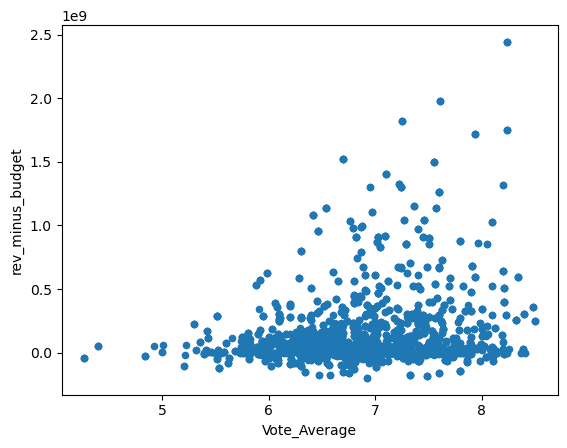

In [114]:
movies_exploded.plot(
    x='Vote_Average',
    y='rev_minus_budget',
    kind='scatter'
)
plt.annotate(text = 'P>|t|=0.000\nR-squared = 0.027', xy = (2e9, 6), fontsize = 12, xytext = (1.5e9, 6))
#plt.annotate(text = 'R-squared = 0.027', xy = (2e9, 6), fontsize = 12, xytext = (2e9, 6))
;

;#, #arrowprops=dict(facecolor='black', shrink=0.1));